<a href="https://colab.research.google.com/github/mars241/CheckPoints/blob/main/2023_Checkpoint_1_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOURCE:
https://github.com/yunuserbas/Checkpoints/blob/main/2022_Checkpoint_1_correction_monnaie.ipynb

C'est ton premier checkpoint. Les 6 exercices sont indépendants. Tu peux donc les effectuer dans l'ordre que tu préfères.

Essaye de finir ce checkpoint en 4h. Si tu n'as pas tout fini, ce n'est pas grave. Tu pourras le reprendre plus tard, tu indiqueras simplement en commentaire ce que tu as fait a posteriori. Nous t'avons indiqué des durées estimatives. Evidemment chacun a ses forces et ses faiblesses, avance donc à ton rythme. Cependant, si tu vois que tu dépasses une durée, ne reste pas bloqué, passe à l'exercice suivant. Tu pourras revenir à la fin sur ce que tu n'as pas fini.


#SQL - 45 min
A partir de la base de données client ci-dessous, crée une requête SQL qui fournit :

1. les noms de chaque catégorie,
2. le chiffre d'affaire associé à cette catégorie,
3. et le prix moyen pondéré des produits vendus pour cette catégorie.

Le chiffre d'affaire sera arrondi à l'unité la plus proche, et le prix moyen comportera 2 décimales.

Ce tableau devra être trié pour avoir les catégories avec le chiffre d'affaire le plus élevé en premier.

*** Voici le schéma de la base ***
*********************

![](https://github.com/murpi/wilddata/blob/master/quests/orders_schema.png?raw=true)




*** Voici les premières lignes attendues ***
*********************

Categories | Chiffre_d_affaire | Prix_moyen
- |:-: | -:
Beverages | 99465 | 43.45
Dairy Products | 69921 | 26.88
... | ... | ...

In [ ]:

# Exécute le code ci-dessous sans rien modifier
import requests
import sqlite3
import pandas as pd
r = requests.get('https://github.com/murpi/wilddata/blob/master/quests/orders.db?raw=true')
open('orders.db', 'wb').write(r.content)
conn = sqlite3.connect('orders.db')
def SQL(script):
    global conn
    return pd.read_sql(script, conn)

In [ ]:
# Modifie la requête SQL dans cette variable
script_sql = """
-- Ici tu peux écrire ton code SQL
SELECT *
FROM ORDERS

"""


# Ne modifie rien ci-dessous pour obtenir le résultat de la requête
SQL(script_sql)

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2
...,...,...,...,...,...
191,10439,51,6,1997-02-07,3
192,10440,71,4,1997-02-10,2
193,10441,55,3,1997-02-10,2
194,10442,20,3,1997-02-11,2


In [ ]:

script_sql = """ SELECT c.categoryName AS Categories, CAST(ROUND(sum(p.price*o.quantity)) as INT) AS Chiffre_d_affaire, ROUND(sum(p.price*o.quantity)/sum(o.quantity), 2) AS Prix_moyen
FROM products p
JOIN categories c USING (categoryID)
JOIN order_details o USING (productID) 
GROUP BY c.categoryName
ORDER BY Chiffre_d_affaire DESC"""

SQL(script_sql)

,Categories,Chiffre_d_affaire,Prix_moyen
0,Beverages,99465,43.45
1,Dairy Products,69921,26.88
2,Confections,54909,26.02
3,Meat/Poultry,51677,40.12
4,Condiments,35072,25.36
5,Seafood,29652,20.52
6,Produce,23401,32.73
7,Grains/Cereals,22328,24.48


# Tableur - 45 min
Le responsable du reporting mensuel est absent, et il faut absolument envoyer le reporting de chiffre d'affaire (quantité * prix de chaque produit) aujourd'hui... mais impossible de remettre la main sur le fichier du mois dernier !

Heureusement, tu as trouvé comment extraire les données, [tu les trouveras ici.](https://docs.google.com/spreadsheets/d/1T7zh6Swn4Yj8Feu-xcp-B7xeOQfBoBSWn7sRjx07GvI/edit?usp=sharing)

Tu vas maintenant devoir recréer un graphique qui ressemblera au maximum à celui-ci, mais en incluant les données du dernier mois. Tu en profiteras pour ajouter l'affichage des mois sous les colonnes. Tu essaieras au maximum d'utiliser les tableaux croisés dynamiques pour faire ca.

Tu incluras l'image du graphique dans ce notebook, et tu indiqueras également le lien de ton google spreadsheet (ou MS Excel online) que tu auras pris soin de partager.

![Tableur checkpoint](https://github.com/murpi/wilddata/raw/master/checkpoint1_withoutdate.png)

** REPONSE

Mon google spreadsheet > https://docs.google.com/spreadsheets/d/17jq-9rQqsxede8XBzc-5OWGqyUAqxzBDAh-TolGo_00/edit?usp=sharing

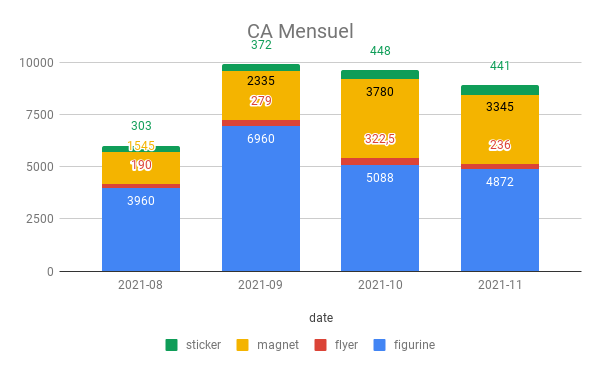

# Python : Algo 1 Météo - 30 min

Tu veux créer un script qui te dit comment t'habiller en fonction de la météo du jour :


## 1.1 Température
* S'il fait strictement plus de 19 degrés,  le script doit afficher "Prends un t-shirt"
* S'il fait entre 12 et 19 degrés inclus, le script doit afficher "Prends un pull"
* S'il fait strictement moins de 12 degrés, le script doit afficher "Prends un manteau"

La variable température contiendra un nombre entier (nous avons mis `14` par défaut, n'hésite pas à modifier cette valeur pour tester)

In [ ]:
temperature = 14

# Tu écriras ton script ici :

if temperature > 19:
  print("Prends un t-shirt")
elif temperature >= 12 and temperature <= 19:
  print("Prends un pull")
else:
  print("Prends un manteau")


Prends un pull


In [ ]:
temperature = 9

# Tu écriras ton script ici :

if temperature > 19:
  print("Prends un t-shirt")
elif temperature >= 12 and temperature <= 19:
  print("Prends un pull")
else:
  print("Prends un manteau")


Prends un manteau


In [ ]:
temperature = 20

# Tu écriras ton script ici :

if temperature > 19:
  print("Prends un t-shirt")
elif temperature >= 12 and temperature <= 19:
  print("Prends un pull")
else:
  print("Prends un manteau")


Prends un t-shirt


## 1.2 Pluie

Tu va recopier ton script de la question précédente (1.1) et le modifier pour intégrer la contrainte suivante :
* Si la variable `pluie` vaut "YES", alors le script affiche "Prends un manteau", quelle que soit la température.

In [ ]:

temperature = 21
pluie = "YES"

# Tu écriras ton script ici :

if pluie == "YES":
  print("Prends un manteau")
elif temperature > 19 and pluie != "YES":
  print("Prends un t-shirt")
elif temperature >= 12 and temperature <= 19 and pluie != "YES":
  print("Prends un pull")
else:
  print("Prends un manteau")


Prends un manteau


## 1.3 Opérateurs logiques (optionnel)

Essaye d'écrire le script précédent (1.2) en utilisant au maximum une seule fois la commande `if` et au maximum une seule fois la commande `elif`.

In [ ]:
# Tu écriras ton script ici :

temperature = 20
pluie = "YES"

# Tu écriras ton script ici :

if pluie == "YES" or temperature < 12:
  print("Prends un manteau")
elif temperature > 19 and pluie != "YES":
  print("Prends un t-shirt")
else :
  print("Prends un pull")

Prends un manteau


# Python : Algo 2 - 30 min

Un magasin importe des produits américains et les revend sur le marché européen. Il propose à ses clients un discount pour les produits les plus chers (10% de réduction à partir de 500 euros d'achat, 15% à partir de 1000 euros, et 20% à partir de 2000 euros).

Le magasin a une liste de prix en dollars et fait appel à tes services pour déterminer pour chaque prix, le montant que paiera le client en euros (après application de la remise). 

## Python 2.1 dollar_to_euro
Crée une fonction `dollar_to_euro` qui prend en paramètre un nombre décimal et retourne le montant converti en euro (dans le sens dollar vers euro, prends le taux en vigueur le jour du checkpoint).

In [ ]:
# For now, 1 dollar = 1.03 euro

def dollar_to_euro(dollar):

  return dollar*1.03

dollar_to_euro(int(input("Enter a number: ")))
 

Enter a number: 10


10.3

## Python 2.2 discount
Crée une fonction `discount` qui prend en paramètre un nombre décimal et retourne le pourcentage de réduction :
- 0.10 si l'argument est supérieur à 500
- 0.15 si l'argument est supérieur à 1000
- 0.20 si l'argument est supérieur à 2000

In [ ]:
def discount(number):
  if 1000 >= number > 500:
    number = number - (number*0.10)
  elif 2000 >= number > 1000:
    number = number - (number*0.15)
  elif number > 2000:
    number = number - (number*0.20)
  return number

discount(int(input("Enter a price: ")))

Enter a price: 5000


4000.0

## Python 2.3 Utilisation
Utilise tes deux fonctions pour **afficher une phrase** pour chacun des montants de cette liste de prix en dollars, indiquant le montant à payer en euros.
Tu dois donc appliquer d'abord la fonction de conversion pour obtenir des euros, puis la fonction de discount, puis afficher une phrase à partir du résultat.

In [ ]:
price_list = [256, 1458, 2387, 669, 508, 1365]
price_euro =[]
for i in price_list:
  a = dollar_to_euro(i)
  price_euro.append(a)

price_euro
discount_list =[]
for y in price_euro:
  b = discount(y)
  discount_list.append(b)
  if y not in discount_list:
     print(f"Le prix est {y} en euro. Le nouveau prix avec le discount est {discount(y)}.")
  else:
     print(f"Le prix est {y} en euro. Il n'y a pas de discount pour ce prix.")

Le prix est 263.68 en euro. Il n'y a pas de discount pour ce prix.
Le prix est 1501.74 en euro. Le nouveau prix avec le discount est 1276.479.
Le prix est 2458.61 en euro. Le nouveau prix avec le discount est 1966.8880000000001.
Le prix est 689.07 en euro. Le nouveau prix avec le discount est 620.163.
Le prix est 523.24 en euro. Le nouveau prix avec le discount est 470.916.
Le prix est 1405.95 en euro. Le nouveau prix avec le discount est 1195.0575000000001.


#Python : Algo 3 - 1h
#1. L'énoncé

Ecris une fonction monnaie_a_rendre() qui prend deux arguments obligatoires :

montant de l'achat : float, supérieur à 0
monnaie du client : integer, supérieur à 0
La fonction devra afficher la monnaie à rendre au client en un minimum de billets/pièces.

Attention, si la monnaie du client est insuffisante (inférieure à l'achat), il faudra l'indiquer.

Exemple :

monnaie_a_rendre(26.57 , 40)
>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1
>>> Nb pièces 20 cents : 2
>>> Nb pièces 2 cents : 1
>>> Nb pièces 1 cent : 1

In [ ]:
 #Ta fonction ici :
from decimal import Decimal

def monnaie_a_rendre(achat, monnaie):
  remainder = monnaie - achat
  if Decimal(remainder) % Decimal(10) != 0:
    a = Decimal(remainder) % Decimal(10)
    print(f" Nb billets 10 euros : {Decimal(remainder) // Decimal(10)}")
    if Decimal(a) % Decimal(2) != 0:
      b = Decimal(a) % Decimal(2)
      print(f" Nb pièces 2 euros : {Decimal(a) // Decimal(2)}")
      if Decimal(b) % Decimal(1) != 0:
        c = Decimal(b) % Decimal(1)
        print(f" Nb pièces 1 euro : {Decimal(b) // Decimal(1)}")
        if Decimal(c) % Decimal(0.20) != 0:
          d = Decimal(c) % Decimal(0.20)
          print(f" Nb pièces 20 cents : {Decimal(c) // Decimal(0.20)}")
          if Decimal(d) % Decimal(0.02) != 0:
            e = Decimal(d) % Decimal(0.02)
            print(f" Nb pièces 2 cents : {Decimal(d) // Decimal(0.02)}")
            if Decimal(e) % Decimal(0.01) != 0:
              print(f" Nb pièces 1 cent : {Decimal(e) // Decimal(0.01)}")
            else:
              print(f" Nb pièces 1 cent : {Decimal(e) // Decimal(0.01)}")
          else:
            print(f" Nb pièces 2 cents : {Decimal(d) // Decimal(0.02)}")
        else:
          print(f" Nb pièces 20 cents : {Decimal(c) // Decimal(0.20)}")
      else:
        print(f" Nb pièces 1 euro : {Decimal(b) // Decimal(1)}")
    else:
      print(f" Nb pièces 2 euros : {Decimal(a) // Decimal(2)}")
  else:
   print(f" Nb billets 10 euros : {Decimal(remainder) // Decimal(10)}")

monnaie_a_rendre(26.57, 40)

 Nb billets 10 euros : 1
 Nb pièces 2 euros : 1
 Nb pièces 1 euro : 1
 Nb pièces 20 cents : 2
 Nb pièces 2 cents : 1
 Nb pièces 1 cent : 0


In [ ]:
# Pour tester :
monnaie_a_rendre(26.57 , 40)

 Nb billets 10 euros : 1
 Nb pièces 2 euros : 1
 Nb pièces 1 euro : 1
 Nb pièces 20 cents : 2
 Nb pièces 2 cents : 1
 Nb pièces 1 cent : 0


# 2. Définir mes montants


In [ ]:

montant_achat = 26.57
monnaie_client = 50

In [ ]:
a_rendre = monnaie_client - montant_achat
a_rendre
     

23.43

#3. Gestion du cas où client a aps assez de monnaie

In [ ]:
### cas où client a aps assez de monnaie géré
if montant_achat > monnaie_client:
    print("Le client n'a pas assez de monnaie")
     

#4. Test en rendant des billets de 10 euros

In [ ]:
nb_a_rendre = a_rendre // 10
nb_a_rendre
     

2.0

In [ ]:

round(a_rendre % 10, 2)

3.43

In [ ]:

37//10 # je peux mettre 3 fois 10 euros dans 37
     

3

In [ ]:

37%10 # il me reste 7 euro une fois que j'ai rendu 3 billers de 10 euros
     

7

#5. Travailler sur tous les billets et pièces

In [ ]:

liste_bill_piec = [100, 50, 20, 10, 5, 2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]

In [ ]:
montant_achat = 26.57
monnaie_client = 50
a_rendre = monnaie_client - montant_achat
a_rendre

23.43

In [ ]:

### version juste pour voir si j'ai les bonnes valeurs qui s'affichent
for i in liste_bill_piec:
    # print(i)
    # print(a_rendre)
    nb_a_rendre = a_rendre // i
    a_rendre = round(a_rendre % i, 2)
    if nb_a_rendre > 0:
        print(f"{nb_a_rendre} de {i}")
    # print()

1.0 de 20
1.0 de 2
1.0 de 1
2.0 de 0.2
1.0 de 0.02
1.0 de 0.01


In [ ]:

### version avec aspect "métier"
for i in liste_bill_piec:
    nb_a_rendre = round(a_rendre // i)
    a_rendre = round(a_rendre % i, 2)
    if nb_a_rendre > 0:
        if i > 5:
            print(f"Nombre de billets de {i} euros : {nb_a_rendre}")
        elif i >= 1:
            print(f"Nombre de pièces de {i} euros : {nb_a_rendre}")
        else:
            print(f"Nombre de pièces de {round(i*100)} centimes : {nb_a_rendre}")

# Pandas - 30 min
Exécute le code suivant, puis réponds aux questions.

Le DataFrame contient 3 colonnes.

In [ ]:
# Exécute le code ci-dessous sans rien modifier
import pandas as pd
temperatures_df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/temp2019.csv", skiprows = 3)
temperatures_df.index = temperatures_df["DATE"]
temperatures_df = temperatures_df[["MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C", "WINDSPEED_MAX_KMH"]]
print("C'est chargé, ton DataFrame Pandas est disponible sous le nom de variable : temperatures_df")

C'est chargé, ton DataFrame Pandas est disponible sous le nom de variable : temperatures_df


In [ ]:

temperatures_df

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH
DATE,,,
2019-01-01,9,4,10
2019-01-02,8,5,18
2019-01-03,6,0,18
2019-01-04,5,-1,15
2019-01-05,6,-1,8
...,...,...,...
2019-12-27,13,10,13
2019-12-28,11,5,12
2019-12-29,9,2,11


## Question Pandas 1

In [ ]:
# Combien y a-t-il de lignes dans le DataFrame ?

# Le fonction "shape" affiche les nombres des lignes et des colonnes. Ici, il y a 356 lignes et 3 colonnes.
temperatures_df.shape

(365, 3)

## Question Pandas 2

In [ ]:

# Affiche la dernière ligne du DataFrame

temperatures_df.iloc[[-1]]

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH
DATE,,,
2019-12-31,10,4,13


## Question Pandas 3

In [ ]:
# Quelle a été la température minimale de la journée du 17 janvier 2019 ?

temperatures_df.loc["2019-01-17", "MIN_TEMPERATURE_C"]

5

## Question Pandas 4

In [ ]:

# Affiche un DataFrame avec les 3 colonnes et uniquement les jours où la vitesse du vent a été supérieure à 40 km/h
# Combien y a-t-il eu de jours concernés ?

temperatures_df.loc[temperatures_df["WINDSPEED_MAX_KMH"] > 40]

# Il y a que trois jours où la vitesse du vent a été supérieure à 40 km/h.

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH
DATE,,,
2019-03-04,11,7,46
2019-06-07,15,13,42
2019-09-29,20,13,41


## Question Pandas 5 (OPTIONNEL)

In [ ]:
# Quelle a été la température minimale du mois de juin ?

juin = temperatures_df.loc["2019-06-01": "2019-06-30", :]
juin

juin["MIN_TEMPERATURE_C"].min()

# La réponse : 7 

7